# Активность пользователей

Мы воспользуемся данными, которые находятся в открытом доступе на Kaggle. Данные принадлежат бразильскому e-commerce Olist. 

Наша цель: посмотреть в общем виде активность пользователей от месяца к месяцу, агрегируя разные переменные. Резульаты мы сопроводим визуализацией.

data from : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Описание столбцов.

**customers**

customer_id - ключ к таблице с заказами. Каждый заказ имеет уникальный customer_id

customer_unique_id - уникальный айди покупателя

customer_zip_code_prefix - почтовый зип код покупателя

customer_city - город клиента

customer_state - штат клиента

**order_items**

order_id - уникальный идентификатор заказа

order_item_id - порядковый номер, идентифицирующий количество позиций включенных в один заказ

product_id - уникальный идентификатор продукта

seller_id - уникальный айди продаваца

price - стоимость товара 

shipping_limit_date - крайняя дата для передачи товара, по которому был оформлен заказ, компании, которая обеспечивает транспортировку заказа.

freight_value - издеркжи, связанные с транспортировкой товара. Если в заказе более одного товара, то стоимость перевозки делится на количество товаров.

**order_payments**

order_id - уникальный айди заказа

payment_sequential - последовательность оплаты. Покупатель может оплатить заказ более чем одним способом оплаты, и если он это сделает, то будет создана последовательнсть.

payment_type - способ оплаты, выбранный покупателем

payment_installments - количество рассрочек, выбранных клиентом

payment_value - стоимость сделки


**orders** 

order_id - уникальный айди заказа

customer_id - ключ к датасету customer. Каждый заказ имеет уникальный айди покупателя.

order_status - статус заказа (доставлен, отправлен и прочее)

order_purchase_timestamp - временная метка покупки

order_approved_at - время подтверждения платежа

order_delivered_carrier_date - время публикации заказа. Показывает, когда он был передан логистическому партнеру

order_delivered_customer_date - показывает фактическую дату доставки заказа покупателю

order_estimated_delivery_date - предполагаемая дата доставки, которая была сообщена покупателю в момент покупки.

# Загрузим библиотеки и таблицы

In [1]:
import pandas as pd
import zipfile

import numpy as np

# визуализация

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zip_file_path = 'D:\Data\kaggle files\Brazilian_E-Commerce_Public_Dataset_by_Olist.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  


customers = pd.read_csv('extracted_files/olist_customers_dataset.csv')
order_items = pd.read_csv('extracted_files/olist_order_items_dataset.csv')
order_payments = pd.read_csv('extracted_files/olist_order_payments_dataset.csv')
orders = pd.read_csv('extracted_files/olist_orders_dataset.csv')
pd.set_option('display.max_columns', None)

In [3]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [6]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [8]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Мы успешно загрузили библиотеки и  четыре таблицы. Приступим к предобработке наших данных

# Предобработка

In [11]:
# проверим пропуски
for x in [customers,order_items, order_payments, orders]:
    print()
    print(x.isnull().any().any())


False

False

False

True


В последнем датафрейме есть пропуски. Узнаем больше

In [12]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# проверим дубликаты
for x in [customers,order_items, order_payments, orders]:
    print()
    if x.duplicated().sum() == 0:
        print('No duplicates')
    else:
        print('There are duplicates')



No duplicates

No duplicates

No duplicates

No duplicates


Посмотрим на дубликаты по столбцам

In [14]:
for i, df in enumerate([customers,order_items, order_payments, orders], start=1):
    print(f"Table {i}:\n")
    
    for column in df.columns:
        num_duplicates = df[column].duplicated().sum()
        
        if num_duplicates > 0:
            print(f"Number of duplicates in {column}: {num_duplicates}\n")
        else:
            print(f"No duplicates in {column}\n")

Table 1:

No duplicates in customer_id

Number of duplicates in customer_unique_id: 3345

Number of duplicates in customer_zip_code_prefix: 84447

Number of duplicates in customer_city: 95322

Number of duplicates in customer_state: 99414

Table 2:

Number of duplicates in order_id: 13984

Number of duplicates in order_item_id: 112629

Number of duplicates in product_id: 79699

Number of duplicates in seller_id: 109555

Number of duplicates in shipping_limit_date: 19332

Number of duplicates in price: 106682

Number of duplicates in freight_value: 105651

Table 3:

Number of duplicates in order_id: 4446

Number of duplicates in payment_sequential: 103857

Number of duplicates in payment_type: 103881

Number of duplicates in payment_installments: 103862

Number of duplicates in payment_value: 74809

Table 4:

No duplicates in order_id

No duplicates in customer_id

Number of duplicates in order_status: 99433

Number of duplicates in order_purchase_timestamp: 566

Number of duplicates in

Приведем к временному типу данных столбцы с временем

In [15]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

# Анализ данных

## Ежемесячный доход 

Извлечем год и месяц для расчета

In [16]:
orders['year_order'] = pd.DatetimeIndex(orders['order_purchase_timestamp']).year
orders['month_order'] = pd.DatetimeIndex(orders['order_purchase_timestamp']).month

# создадим столбец где будет месяц и год формата "год-месяц"
orders['year_month'] = orders['year_order'].astype(str) + '-' + orders['month_order'].astype(str).str.zfill(2)

#orders['year_month'] = pd.to_datetime(orders['year_month'] , format='%Y-%m')


Для извлечения поступления денег необходимо извлечь данные из таблицы order_payments. Объединим её с таблицей orders

In [17]:
combine_orders_payments = orders.merge(order_payments, on='order_id', how='inner')

In [18]:
combine_orders_payments.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
year_order                          0
month_order                         0
year_month                          0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [19]:
print(combine_orders_payments['order_purchase_timestamp'].min())

print(combine_orders_payments['order_purchase_timestamp'].max())

2016-09-04 21:15:19
2018-10-17 17:30:18


In [20]:
combine_orders_payments.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_order,month_order,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,3,voucher,1,2.00


In [21]:
monthly_revenue = combine_orders_payments.groupby('year_month')['payment_value'].sum().reset_index(name='revenue')
monthly_revenue = monthly_revenue.sort_values(by='year_month', ascending=True)

monthly_revenue['growth'] = round(monthly_revenue['revenue'].pct_change() * 100, 1)

monthly_revenue['growth'] = monthly_revenue['growth'].fillna(0)

# growth - прирост в процентах. Т.е. разница между текущей суммой дохода и предыдущей по отношению к предшесвтующему показателю

Визуализируем

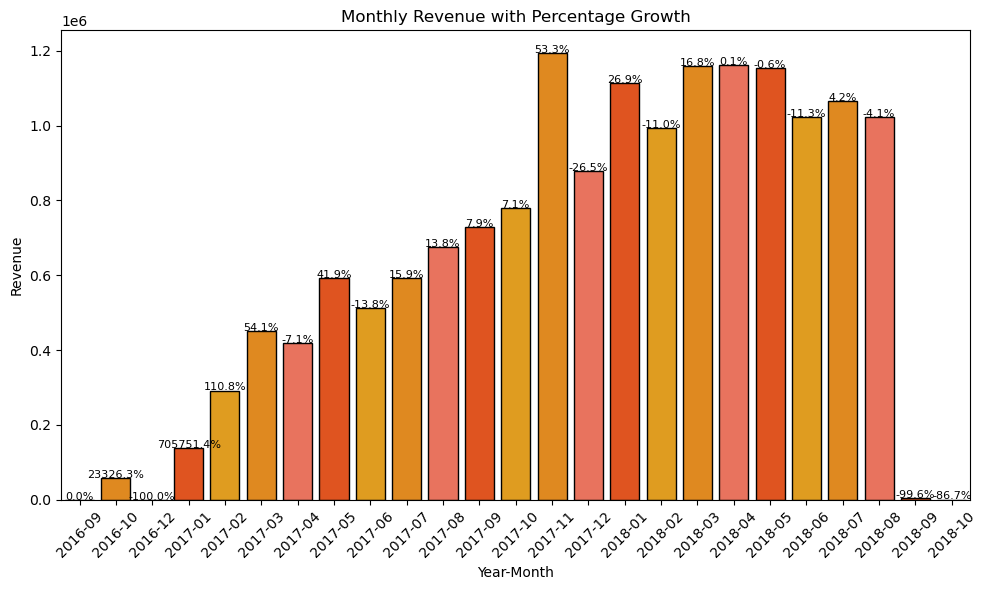

In [22]:
custom_palette = sns.color_palette(["#FFA500", "#FF8C00", "#FF6347", "#FF4500"])
#sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month', y='revenue', data=monthly_revenue, edgecolor='black', palette = custom_palette )

for index, row in monthly_revenue.iterrows():
    percentage = row['growth']
    plt.text(index, row['revenue'] + 50, f'{percentage}%', ha='center', fontsize=8, color='black')

plt.title('Monthly Revenue with Percentage Growth')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Мы видим пробелы в данных: 

В 2016 году недостает данных за сентябрь, ноябрь и декабрь. 

В 2018 году также провалы в данных за сентябрь и октябрь. 

В отрыве от пробельных месяцев, можем выделить два тренда доходов по месяцу:

До ноября 2017 года - доходы росли, с пиком в ноябре 2017 года.

Последующий тренд - это стагнация.  Доходы изменяются в одном диапозоне: то возрастают, то сокращаются.

## Ежемесячное количество заказов

In [23]:
combine_orders_payments.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_order,month_order,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,3,voucher,1,2.00


In [24]:
monthly_orders = combine_orders_payments.groupby('year_month')['order_id'].count().reset_index(name='count_orders')
monthly_orders = monthly_orders.sort_values(by='year_month', ascending=True)

monthly_orders['growth'] = round(monthly_orders['count_orders'].pct_change() * 100, 1)

monthly_orders['growth'] = monthly_orders['growth'].fillna(0)

In [25]:
monthly_orders.head()

,year_month,count_orders,growth
0,2016-09,3,0.0
1,2016-10,342,11300.0
2,2016-12,1,-99.7
3,2017-01,850,84900.0
4,2017-02,1886,121.9


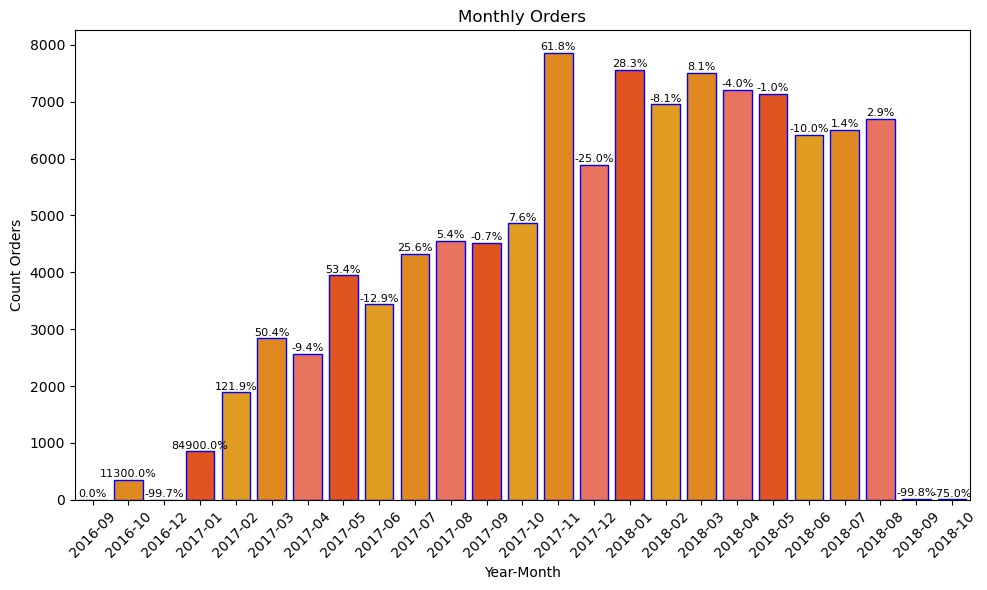

In [26]:
custom_palette = sns.color_palette(["#FFA500", "#FF8C00", "#FF6347", "#FF4500"])
#sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month', y='count_orders', data=monthly_orders, edgecolor='Blue', palette = custom_palette )

for index, row in monthly_orders.iterrows():
    percentage = row['growth']
    plt.text(index, row['count_orders'] + 50, f'{percentage}%', ha='center', fontsize=8, color='black')


plt.title('Monthly Orders')
plt.xlabel('Year-Month')
plt.ylabel('Count Orders')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Количество заказов повторяет два тренда, описанных выше:

До ноября 2017 года включительно - рост заказов, после - стагнация. 

Значит, основная причина трендов, связанных с доходами - заказы. Сократилось количество заказов, а вместе с ним и доходы, а не удешевление заказов с ростом заказов.

## Ежемесячная активность клиентов

Узнаем, какое количество уникальных покупателей ежемесячно взаимодействуют с нашим маркетплейсом 

In [27]:
combine_customers_orders = orders.merge(customers, on='customer_id', how='inner')

In [28]:
monthly_activity = combine_customers_orders.groupby('year_month')['customer_unique_id'].nunique().reset_index(name='unique_count')
monthly_activity = monthly_activity.sort_values(by='year_month', ascending=True)

monthly_activity['growth'] = round(monthly_activity['unique_count'].pct_change() * 100, 1)

monthly_activity['growth'] = monthly_activity['growth'].fillna(0)

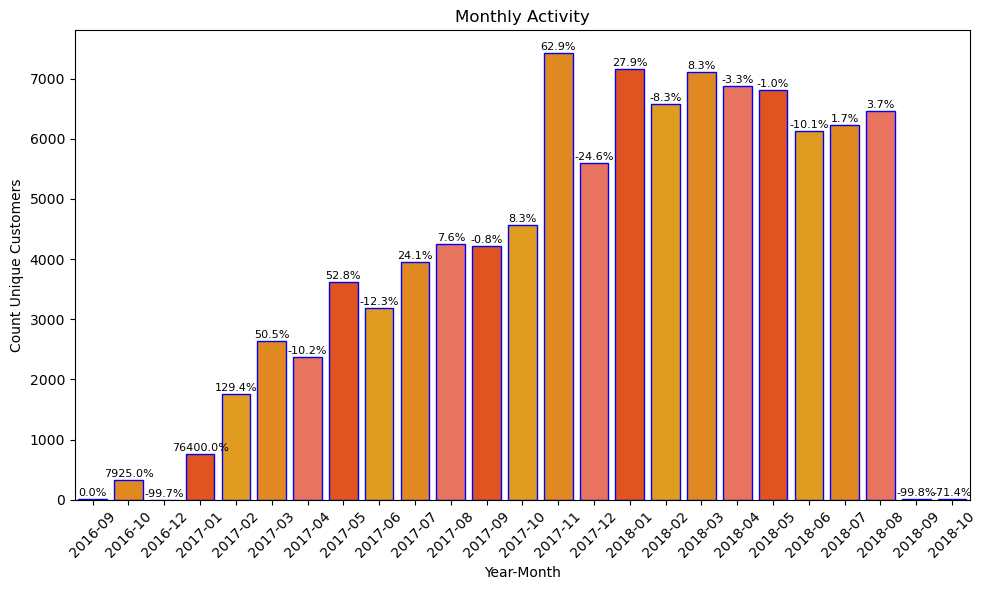

In [29]:
custom_palette = sns.color_palette(["#FFA500", "#FF8C00", "#FF6347", "#FF4500"])
#sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month', y='unique_count', data=monthly_activity, edgecolor='Blue', palette = custom_palette )

for index, row in monthly_activity.iterrows():
    percentage = row['growth']
    plt.text(index, row['unique_count'] + 50, f'{percentage}%', ha='center', fontsize=8, color='black')


plt.title('Monthly Activity')
plt.xlabel('Year-Month')
plt.ylabel('Count Unique Customers')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Количество уникальных пользователей росло ежемесячно до ноября 2017 года, после - стагнация.

Можно описать следующую цепочку наблюдений:

У маркетлейса до ноября 2017 года растет активность уникальных клиентов, что приводит к увеличению количества заказов и увеличению ежемесячного дохода.

После ноября 2017 года количество уникальных клиентов завершает свой и ежемесячно на сервисе совершают покупки примерно одинаковое количество покупателей. Заказы и доходы также останавливается в росте.

Вероятно, маркетплейс достиг предела в охвате пользователей в данном регионе и дальнейший рост возможен только через экспансию на иностранные рынки. 

Если такая экспансия невозможно, необходимо стимулировать текущих клиентов совершать больше покупок. Это возможно сделать за счет сокращение издержек маркетплейса и, следовательно, сокращение цены. 

Иной вариант - расширение корзины товаров, стимулирование конкуренции между продавцами, улучшение платежной инфраструктуры и тд.

## Средний доход за месяц

In [30]:
combine_orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_order,month_order,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2018-08,1,credit_card,3,179.12


In [31]:
averge_revenue_per_month = combine_orders_payments.groupby('year_month')['payment_value'].mean().reset_index(name='mean_revenue')
averge_revenue_per_month = averge_revenue_per_month.sort_values(by='year_month', ascending=True)

averge_revenue_per_month['growth'] = round(averge_revenue_per_month['mean_revenue'].pct_change() * 100, 1)

averge_revenue_per_month['growth'] = averge_revenue_per_month['growth'].fillna(0)

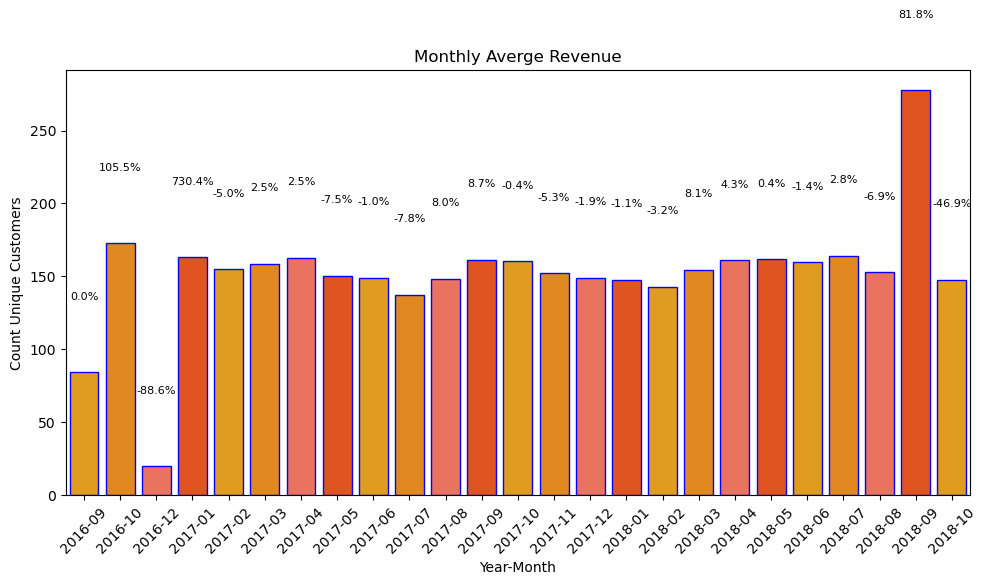

In [32]:
custom_palette = sns.color_palette(["#FFA500", "#FF8C00", "#FF6347", "#FF4500"])
#sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month', y='mean_revenue', data=averge_revenue_per_month, edgecolor='Blue', palette = custom_palette )

for index, row in averge_revenue_per_month.iterrows():
    percentage = row['growth']
    plt.text(index, row['mean_revenue'] + 50, f'{percentage}%', ha='center', fontsize=8, color='black')


plt.title('Monthly Averge Revenue')
plt.xlabel('Year-Month')
plt.ylabel('Count Unique Customers')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Как мы видим, средний доход от месяца к месяцу находится на близком уровне. 

Есть любопытное наблюдение: в сентябре 2018 года средняя стоимость заказа взлетает на 82%, а в октбре опускается на 47% и возвращается августовского уровня. Мы могли бы прийти к выводу, что в сентябре 2018 года вследствие каких-то причин стали совершать дорогие покупки и возрос средни доход (например, новую продукцию Apple активно разбирают), который в октябре опустился до прежних уровней. Однако, предшествующий анализ напоминает нам, что в эти месяцы имеется дефицит данных: активность, совокупный доход, количество заказов упало почти до нуля. Т.е. расчет срднего произошел из мизерного количества наблюдений и это могло бы привести нас к заблуждению.

## Коэффициент новых покупателей

In [33]:
df = order_payments.merge(order_items, on='order_id').merge(orders, on='order_id').merge(customers, on='customer_id')


In [34]:
firts_purchase = df.groupby('customer_unique_id')['year_month'].min().reset_index(name='first_purchase')

#firts_purchase['add_first_purchase'] = firts_purchase['first_purchase'].map(lambda date: 100*date.year + date.month)

#firts_purchase['first_ym'] = firts_purchase['first_purchase'].apply(lambda x: x.strftime('%Y-%m'))

In [36]:
df = df.merge(firts_purchase, on='customer_unique_id', how='inner')

In [39]:
df['check_new_customer'] = 'new'  

df['check_new_customer'] = np.where(df['year_month'] > 
                                                        df['first_purchase'], 'existing', 'new')

In [40]:
df.shape

(117601, 27)

In [41]:
df = df.drop_duplicates(subset=['payment_value', 'order_purchase_timestamp', 'customer_unique_id'], keep='first')

df.shape

(102421, 27)

In [42]:
df_user_type_revenue = df.groupby(['year_month','check_new_customer'])['payment_value'].sum().reset_index()


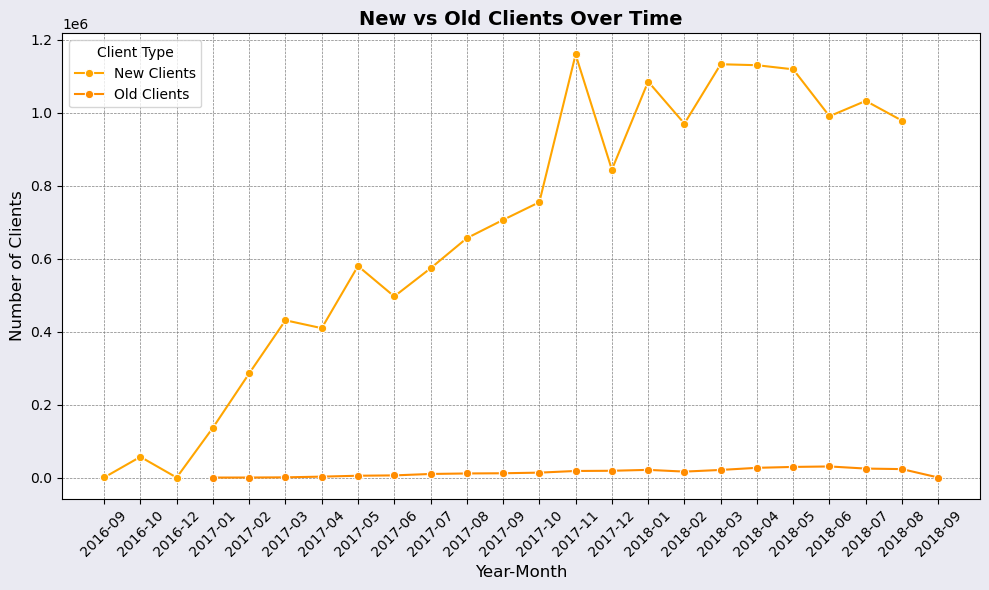

In [44]:
custom_orange_palette = ["#FFA500", "#FF8C00"]

sns.set_palette(custom_orange_palette)

plt.figure(figsize=(10, 6), facecolor='#EAEAF2')

sns.lineplot(x='year_month', y='payment_value', data=df_user_type_revenue.query('check_new_customer == "new"'), 
             label='New Clients', marker='o')
sns.lineplot(x='year_month', y='payment_value', data=df_user_type_revenue.query('check_new_customer == "existing"'), 
             label='Old Clients', marker='o')

plt.title('New vs Old Clients Over Time', fontsize=14, fontweight='bold')

plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Client Type', fontsize=10)

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

По графикам мы видим, что доход за месяц реализуется, в основе своей, за счет покупок новых клиентов (т.е. появившихся в месяце расчета дохода впервый раз). Это значит, что покупатели не совершают покупки после совершения первой покупки.

Считаем коэффициент

In [46]:
df_user_ratio = (df.query("check_new_customer == 'new'").groupby(['year_month'])['customer_unique_id'].nunique()
                 / df.query("check_new_customer == 'existing'").groupby(['year_month'])['customer_unique_id'].nunique())
df_user_ratio = df_user_ratio.reset_index()

# удалим пустые значения для первого и последнего месяца
df_user_ratio = df_user_ratio.dropna()

df_user_ratio.columns = ['year_month','ratio']
df_user_ratio['ratio'] = df_user_ratio['ratio'] * 100

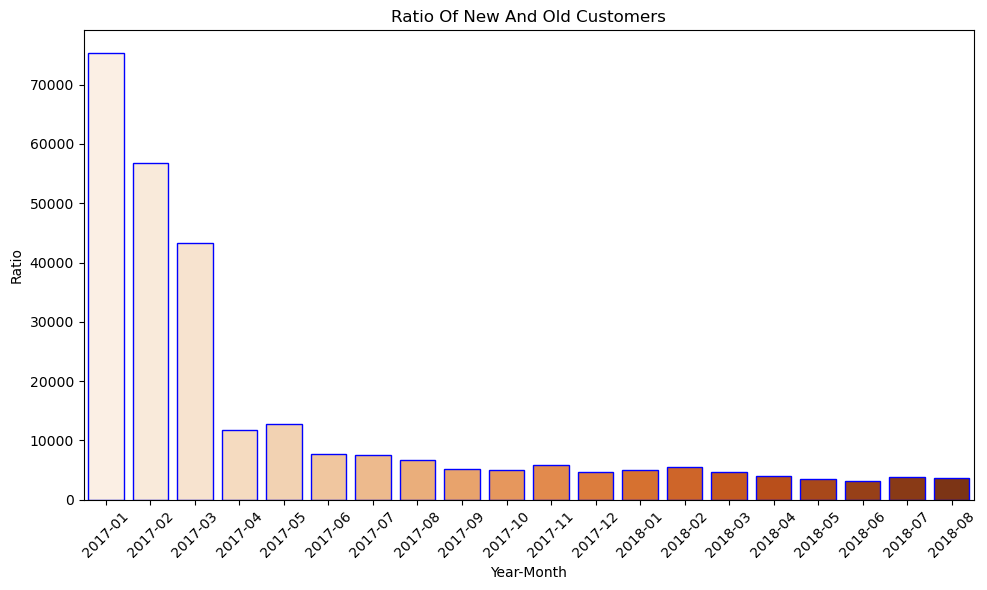

In [48]:
custom_palette = sns.color_palette("Oranges", len(df_user_ratio))

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month', y='ratio', data=df_user_ratio, edgecolor='Blue', palette=custom_palette)

plt.title('Ratio Of New And Old Customers')
plt.xlabel('Year-Month')
plt.ylabel('Ratio')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Доля новых клиентов, совершивших покупку, по отношению к старым клиентам, совершившим покупку составляет тысячи процентов. Т.е. новых клиентов в каждом месяце во много раз больше, чем старых. Соотношение новых/старых с каждым месяцем сокращается: в январе 75.4 тыс % доля новых клиентов по отношению к старым, а в августе 3.6 тыс % 

## Retantion Rate

Посчитаем **удержание** выполнив следующие шаги:

1. Расчитаем лайфтайм покупок для каждого клиента
2. Построим таблиу удержания: в индексах будет располагаться месяц возникновения клиентов, а в столбцах количество клиентов на каждом лайфтайме
3. Вычислим когорты: в какие месяцы появились клиенты впервый раз
4. Объединим таблицы по дате
5. Вычислим удержание: поделим количество покупателей на каждом лайфтайме на размер когорты
6. Постром тепловую карту

Расчитаем лайфтайм и таблицу удержания

In [49]:
# считаем лайфтайм
df['lifetime_months'] = (pd.to_datetime(df['year_month']) - pd.to_datetime(df['first_purchase'])).dt.days // 30

# строим таблицу удержания

for_retantion = df.pivot_table(
    index=['first_purchase'], columns='lifetime_months', values='customer_unique_id', aggfunc='nunique'
)

for_retantion

lifetime_months,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase,,,,,,,,,,,,,,,,,,,,
2016-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,305.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,754.0,5.0,NaN,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1705.0,5.0,2.0,NaN,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2595.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2339.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05,3560.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,10.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3114.0,15.0,11.0,12.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


Следующий шаг — вычислить размеры когорт. Сгруппируем данные по дате первого посещения из df и посчитаем количество уникальных пользователей в каждой когорте, применив функцию nunique к столбцу customer_unique_id. Столбец с результатами переименуем в соответствии с содержанием в cohort_size — размер когорты.

In [50]:
cohort_sizes = (
    df.groupby('first_purchase')
    .agg({'customer_unique_id': 'nunique'})
    .rename(columns={'customer_unique_id': 'cohort_size'} )
)

#cohort_sizes = cohort_sizes.reset_index().rename(columns={'first_purchase': 'year_month'} )

#cohort_sizes = cohort_sizes.set_index('year_month')
cohort_sizes

,cohort_size
first_purchase,
2016-09,2
2016-10,305
2016-12,1
2017-01,754
2017-02,1705
2017-03,2595
2017-04,2339
2017-05,3560
2017-06,3114


Объединим таблицу размеров когорт с таблицей удержания по столбцу first_purchase методом merge(). Отсутствующие значения NaN заменим на 0 методом fillna().

In [51]:
# объединяем размеры когорт и таблицу удержания

for_retantion = cohort_sizes.merge(
    for_retantion, on='first_purchase', how='left'
).fillna(0)

for_retantion = for_retantion.reset_index().rename(columns={'first_purchase': 'year_month'} )

for_retantion = for_retantion.set_index('year_month')

In [52]:
# делим данные таблицы удержания на размеры когорт

for_retantion = for_retantion.div(
    for_retantion['cohort_size'], axis=0
).drop(columns=['cohort_size'])

for_retantion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
year_month,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003279,0.000000,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.006557,0.006557
2016-12,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.006631,0.000000,0.001326,0.003979,0.001326,0.003979,0.001326,0.001326,0.000000,0.003979,0.001326,0.006631,0.003979,0.001326,0.001326,0.002653,0.003979,0.001326,0.000000
2017-02,1.0,0.002933,0.001173,0.000000,0.004106,0.001173,0.002346,0.001760,0.001173,0.001760,0.001173,0.002933,0.001173,0.001760,0.001173,0.000587,0.000587,0.002346,0.000000,0.000000
2017-03,1.0,0.005010,0.003468,0.003854,0.003468,0.001541,0.001541,0.003083,0.003468,0.000771,0.003854,0.001156,0.002312,0.001156,0.001541,0.002312,0.000771,0.001541,0.000000,0.000000
2017-04,1.0,0.005985,0.002138,0.001710,0.003420,0.002565,0.003420,0.002993,0.002993,0.001710,0.002565,0.000855,0.000855,0.000428,0.000855,0.000855,0.001710,0.000000,0.000000,0.000000
2017-05,1.0,0.004775,0.004775,0.003933,0.003090,0.003371,0.004213,0.001404,0.002528,0.002809,0.002528,0.003371,0.002528,0.000281,0.001966,0.002528,0.000000,0.000000,0.000000,0.000000
2017-06,1.0,0.004817,0.003532,0.003854,0.002569,0.003854,0.003854,0.002248,0.001285,0.002248,0.003211,0.003532,0.001606,0.001285,0.001927,0.000000,0.000000,0.000000,0.000000,0.000000


В качестве момента анализа выберем последующий за данными месяц, а в качестве горизонта анализа - 1 год, то есть 12 лайфтамов равных 1 месяцу.

In [53]:
for_retantion.index = pd.to_datetime(for_retantion.index)

max_index = for_retantion.index.max()

max_index = for_retantion.index.max() + pd.DateOffset(months=1)

for_retantion = for_retantion[(max_index - for_retantion.index) >= pd.Timedelta(days=365*1)]


for_retantion.index = for_retantion.index.strftime('%Y-%m')

for_retantion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
year_month,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003279,0.000000,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.000000,0.003279,0.006557,0.006557
2016-12,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.006631,0.000000,0.001326,0.003979,0.001326,0.003979,0.001326,0.001326,0.000000,0.003979,0.001326,0.006631,0.003979,0.001326,0.001326,0.002653,0.003979,0.001326,0.000000
2017-02,1.0,0.002933,0.001173,0.000000,0.004106,0.001173,0.002346,0.001760,0.001173,0.001760,0.001173,0.002933,0.001173,0.001760,0.001173,0.000587,0.000587,0.002346,0.000000,0.000000
2017-03,1.0,0.005010,0.003468,0.003854,0.003468,0.001541,0.001541,0.003083,0.003468,0.000771,0.003854,0.001156,0.002312,0.001156,0.001541,0.002312,0.000771,0.001541,0.000000,0.000000
2017-04,1.0,0.005985,0.002138,0.001710,0.003420,0.002565,0.003420,0.002993,0.002993,0.001710,0.002565,0.000855,0.000855,0.000428,0.000855,0.000855,0.001710,0.000000,0.000000,0.000000
2017-05,1.0,0.004775,0.004775,0.003933,0.003090,0.003371,0.004213,0.001404,0.002528,0.002809,0.002528,0.003371,0.002528,0.000281,0.001966,0.002528,0.000000,0.000000,0.000000,0.000000
2017-06,1.0,0.004817,0.003532,0.003854,0.002569,0.003854,0.003854,0.002248,0.001285,0.002248,0.003211,0.003532,0.001606,0.001285,0.001927,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
# отсеиваем ненужные лайфтаймы
for_retantion = for_retantion.iloc[:, :13]

Строим тепловую карту

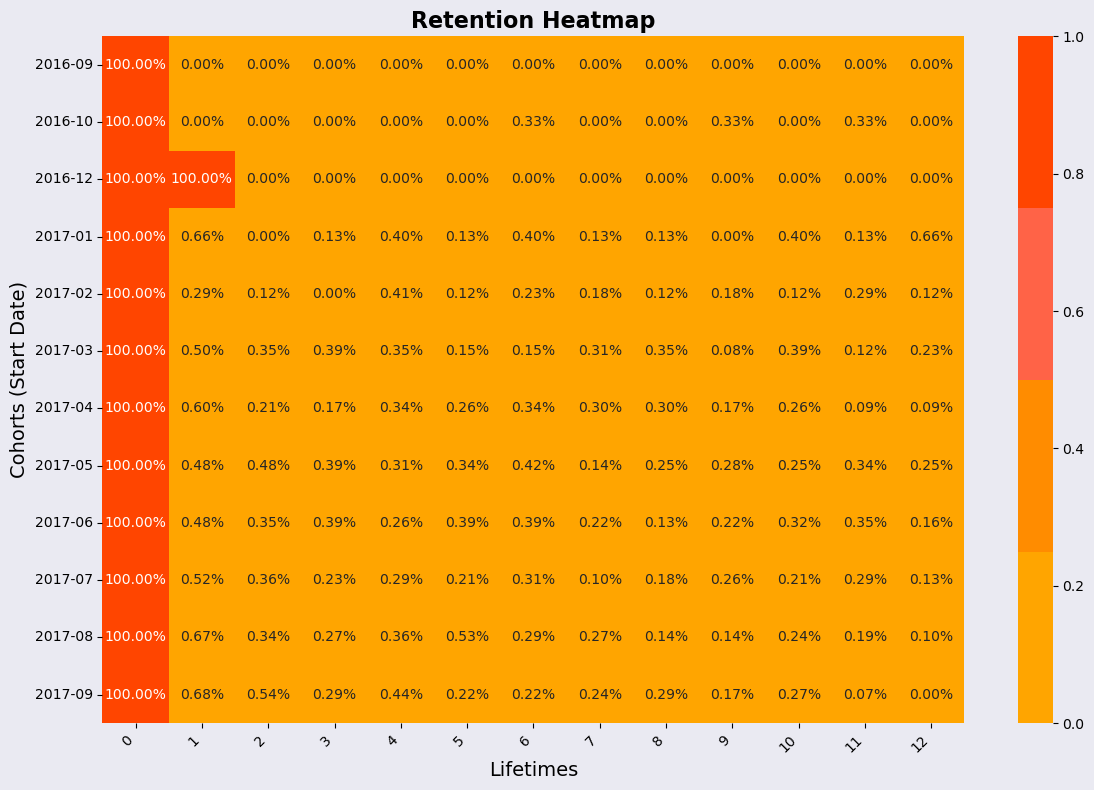

In [55]:
custom_orange_palette = ["#FFA500", "#FF8C00", "#FF6347", "#FF4500"]

plt.figure(figsize=(12, 8), facecolor='#EAEAF2')

ax = sns.heatmap(for_retantion, cmap=custom_orange_palette, annot=True, fmt=".2%", cbar=True)

plt.title('Retention Heatmap', fontsize=16, fontweight='bold')

plt.xlabel('Lifetimes', fontsize=14)
plt.ylabel('Cohorts (Start Date)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=10)

plt.tight_layout()
plt.show()

У нас вышло 12 когорт для которых мы расчитали удержание. Горизонт анализа был выбран в 12 месяцев равный 12 лайфтаймам. 

В первые три месяца у нас есть недостаток данных, поэтому проанализируем лишь 9 месяцев: с января 17 года по сентябрь 17 года включительно. 

Удержание по всем когортам очень низкое и не достигает и 1% ни за один лайфтайм. 

Нет явного тренда на улучшение удержания с каждой новой когортой, сформированной в последующем месяце.

# Заключение

Ежемесячные доходы: До ноября 2017 года компания демонстрировала рост ежемесячных доходов, но после этой даты наблюдается стагнация. Это свидетельствует о насыщении рынка в данном регионе. Дальнейший рост может потребовать экспансии на другие рынки или стимулирования текущих клиентов.

Ежемесячное количество заказов: Рост количества заказов до ноября 2017 года и последующая стагнация указывают на связь между заказами и доходами. Сокращение количества заказов послужило убыванию доходов.

Ежемесячная активность клиентов: Рост уникальных клиентов до ноября 2017 года сопровождался увеличением заказов и доходов. Стагнация активности клиентов после этой даты свидетельствует о насыщении рынка.

Средний доход за месяц: Стабильный средний доход указывает на отсутствие существенных изменений в структуре продаж, но обратите внимание, что наблюдения в сентябре 2018 года основаны на малом количестве данных и могут быть не совсем надежными.

Коэффициент новых пользователей: Факт, что большая часть доходов приходит от новых клиентов, говорит о проблеме удержания клиентов после первой покупки. Стремительное сокращение доли новых клиентов к старым также подтверждает неэффективность удержания.

Коэффициент удержания: Уровень удержания очень низкий и не улучшается с формированием новых когорт. Это свидетельствует о том, что компания сталкивается с проблемой удержания клиентов после первой покупки, что может сильно влиять на долгосрочную прибыль.

Исходя из этих выводов, компания может рассмотреть следующие стратегии:

1. Расширение на новые рынки, если это возможно, чтобы компенсировать насыщение текущего рынка.
2. Улучшение мероприятий по удержанию клиентов после первой покупки.
3. Внимательный мониторинг и анализ данных, особенно в периоды с ограниченными данными, чтобы избежать ошибочных выводов.
4. Эксперименты с ценовой политикой, ассортиментом товаров и другими мерами для стимулирования повторных покупок.
5. Важно продолжать мониторить и анализировать данные, чтобы принимать информированные решения и адаптировать стратегию компании к изменяющимся условиям рынка.